In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
finaldata=pd.read_csv("finaldata.csv")

In [3]:
finaldata.head()

,id,Depression,Study Satisfaction,Age,Work/Study Hours,Academic Pressure,Financial Stress,CGPA,Name,Work Pressure,...,City_Vaishnavi,City_Varanasi,City_Vasai-Virar,City_Vidhi,City_Vidya,City_Visakhapatnam,Gender_Female,Gender_Male,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,2,1,2.0,33.0,3.0,5.0,1.0,8.97,Yuvraj,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,8,0,5.0,24.0,3.0,2.0,2.0,5.90,Aishwarya,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26,0,5.0,31.0,9.0,3.0,1.0,7.03,Aditya,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,30,1,2.0,28.0,4.0,3.0,5.0,5.59,Prisha,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,32,0,3.0,25.0,1.0,4.0,1.0,8.13,Chhavi,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131926 entries, 0 to 131925
Columns: 352 entries, id to Family History of Mental Illness_Yes
dtypes: float64(349), int64(2), object(1)
memory usage: 354.3+ MB


In [5]:
finaldata.isna().sum()

id                                      0
Depression                              0
Study Satisfaction                      0
Age                                     0
Work/Study Hours                        0
                                       ..
City_Visakhapatnam                      0
Gender_Female                           0
Gender_Male                             0
Family History of Mental Illness_No     0
Family History of Mental Illness_Yes    0
Length: 352, dtype: int64

In [6]:
name_column=finaldata["Name"]
finaldata=finaldata.drop("Name",axis=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X=finaldata.drop("Depression",axis=1)
y=finaldata["Depression"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
rf_score=clf.score(X_test,y_test)

clf1= LogisticRegression(max_iter=500,random_state=42)
clf1.fit(X_train,y_train)
lr_score=clf1.score(X_test,y_test)

clf2=DecisionTreeClassifier(random_state=42)
clf2.fit(X_train,y_train)
dt_score=clf2.score(X_test,y_test)

C:\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
print("Random forest :",rf_score)
print("Logistic Regression :",lr_score)
print("Decision Tree :",dt_score)

Random forest : 0.9363677707875389
Logistic Regression : 0.9408019404229515
Decision Tree : 0.9125293716364739


In [9]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,classification_report,recall_score
from sklearn.model_selection import cross_val_score

In [10]:
cvs=cross_val_score(clf,X,y,cv=5)
print("Random forest cross validation",cvs,np.mean(cvs))

cvs1=cross_val_score(clf1,X,y,cv=5)
print("Logistic Regression cross validation",cvs1,np.mean(cvs1))

cvs2=cross_val_score(clf2,X,y,cv=5)
print("Decision Tree cross validation",cvs2,np.mean(cvs2))

Random forest cross validation [0.31910862 0.93367444 0.93090771 0.8240288  0.83115406] 0.7677747272418555


C:\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

Logistic Regression cross validation [0.55571136 0.96570021 0.96221338 0.95387531 0.88614743] 0.8647295379089476
Decision Tree cross validation [0.17137876 0.7647906  0.70449119 0.40238772 0.77445518] 0.5635006907048591


In [11]:
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)
pd.crosstab(y_test,y_preds,rownames=["Actual Label"],
            colnames=["Prediction Label"])

Prediction Label,0,1
Actual Label,,
0,21284,610
1,1069,3423


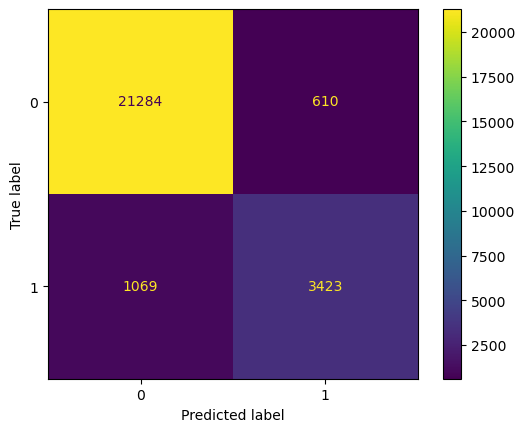

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)

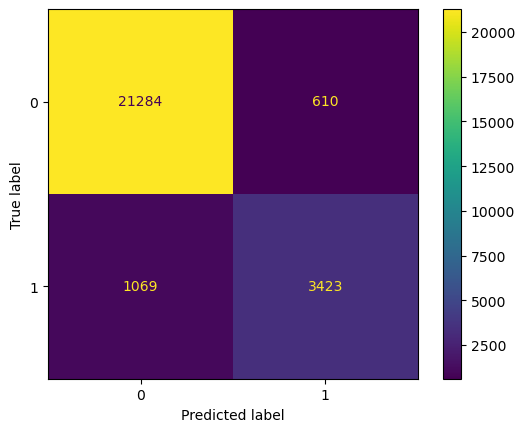

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

In [14]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21894
           1       0.85      0.76      0.80      4492

    accuracy                           0.94     26386
   macro avg       0.90      0.87      0.88     26386
weighted avg       0.93      0.94      0.93     26386



In [15]:
#scoring parameter

In [16]:
np.random.seed(42)

cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')

cv_accuracy = cross_val_score(clf,X,y,cv=5,scoring='accuracy')

cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')

cv_recall=cross_val_score(clf,X,y,scoring='recall')

C:\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [17]:
print(cv_precision,cv_accuracy,cv_f1,cv_recall)
print(np.mean(cv_precision))
print(np.mean(cv_accuracy))
print(np.mean(cv_f1))
print(np.mean(cv_recall))

[0.19869765 0.86563936 0.90517241 0.12698413 0.        ] [0.31910862 0.93367444 0.93090771 0.8240288  0.83115406] [0.33152255 0.78538141 0.76333896 0.01359677 0.        ] [1.         0.71874299 0.65993266 0.00718294 0.        ]
0.4192987104583912
0.7677747272418555
0.3787679371020647
0.4771717171717172


In [18]:
ascore=accuracy_score(y_test,y_preds)
pscore=precision_score(y_test,y_preds)
f1score=f1_score(y_test,y_preds)
rcall =recall_score(y_test,y_preds)

print(f"Accuracy: {ascore*100:.2f}%")
print(f"Precision: {pscore*100:.2f}%")
print(f"f1 score: {f1score*100:.2f}%")  
print(f"Recall: {rcall*100:.2f}%")

Accuracy: 93.64%
Precision: 84.87%
f1 score: 80.30%
Recall: 76.20%


In [19]:
#ROC ,AUC ,hyperparameter tuning

In [20]:
# ROC
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(X_test)
y_probs[:10]

array([[0.99, 0.01],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.53, 0.47],
       [1.  , 0.  ]])

In [21]:
y_probs_positive=y_probs[:,1]

In [22]:
y_probs_positive

array([0.01, 0.02, 0.05, ..., 0.02, 0.02, 0.01], shape=(26386,))

In [23]:
fpr,tpr,thresholds =roc_curve(y_test,y_probs_positive)

In [24]:
fpr

array([0.00000000e+00, 4.56746140e-05, 4.56746140e-05, 9.13492281e-05,
       2.74047684e-04, 3.65396912e-04, 5.93769983e-04, 1.00484151e-03,
       1.27888919e-03, 1.50726226e-03, 1.64428611e-03, 1.91833379e-03,
       2.19238147e-03, 2.28373070e-03, 2.55777839e-03, 2.96884991e-03,
       3.33424683e-03, 3.74531835e-03, 4.33908833e-03, 4.70448525e-03,
       5.43527907e-03, 5.75500137e-03, 6.21174751e-03, 6.94254134e-03,
       7.21658902e-03, 7.85603362e-03, 8.54115283e-03, 9.27194665e-03,
       9.63734356e-03, 1.04138120e-02, 1.10989312e-02, 1.19210743e-02,
       1.23778204e-02, 1.32456381e-02, 1.37937334e-02, 1.46615511e-02,
       1.51639719e-02, 1.59404403e-02, 1.71279803e-02, 1.78587741e-02,
       1.89549648e-02, 1.96857587e-02, 2.00968302e-02, 2.11473463e-02,
       2.21978624e-02, 2.28829816e-02, 2.39334978e-02, 2.48013154e-02,
       2.57148077e-02, 2.67653238e-02, 2.78615146e-02, 2.96884991e-02,
       3.10587376e-02, 3.25659998e-02, 3.33881429e-02, 3.44843336e-02,
      

In [25]:
tpr

array([0.        , 0.00356189, 0.01580588, 0.03361532, 0.06077471,
       0.08593054, 0.11420303, 0.14269813, 0.1720837 , 0.20080142,
       0.22951915, 0.25445236, 0.28072128, 0.30520926, 0.32769368,
       0.35284951, 0.37488869, 0.39759573, 0.41429207, 0.42720392,
       0.44390027, 0.46326803, 0.4777382 , 0.49309884, 0.50912734,
       0.52137133, 0.53495102, 0.54652716, 0.56032947, 0.57569012,
       0.58682102, 0.59928762, 0.60930543, 0.61731968, 0.62733749,
       0.63668744, 0.64247551, 0.65293856, 0.66162066, 0.67319679,
       0.68232413, 0.69211932, 0.70102404, 0.70837044, 0.7141585 ,
       0.72195013, 0.72996438, 0.7388691 , 0.7475512 , 0.75356189,
       0.76202137, 0.77003562, 0.77760463, 0.78406055, 0.79029386,
       0.79764025, 0.80454141, 0.81211042, 0.81878896, 0.82502226,
       0.83125557, 0.83615316, 0.8428317 , 0.84884239, 0.85507569,
       0.85930543, 0.86331256, 0.86731968, 0.87266251, 0.87689225,
       0.88268032, 0.88601959, 0.89069457, 0.89492431, 0.89826

In [26]:
thresholds

array([ inf, 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])

In [27]:
#plotting roc curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("Fale positve rate")
    plt.ylabel("True positive rate")
    plt.title("ROC CURVE")
    plt.legend()
    plt.show()

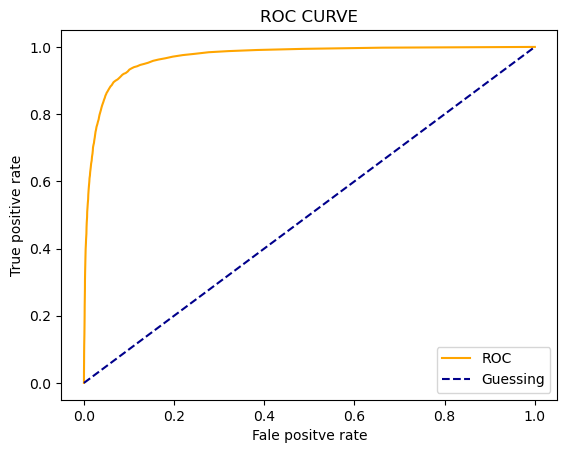

In [28]:
plot_roc_curve(fpr,tpr)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9699681024032167

In [30]:
#Adjusting hyperparameters

In [31]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [32]:
from sklearn.model_selection import RandomizedSearchCV


In [33]:
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

In [34]:
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)

In [35]:
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  28.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  29.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

C:\env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\env\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\env\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
    

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [36]:
def evaluation_preds(y_test,y_preds):
	ascore=accuracy_score(y_test,y_preds)
	pscore=precision_score(y_test,y_preds)
	f1score=f1_score(y_test,y_preds)
	rcall =recall_score(y_test,y_preds)
	all_metrics={"accuracy":round(ascore,2),
			"precision":round(pscore,2),
			"f1score":round(f1score,2),
			"recall":round(rcall,2)}
	print(f"Accuracy: {ascore*100:.2f}%")
	print(f"Precision: {pscore*100:.2f}%")
	print(f"f1 score: {f1score*100:.2f}%")  
	print(f"Recall: {rcall*100:.2f}%")
	return all_metrics

In [37]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [38]:
rs_y_preds=rs_clf.predict(X_test)

In [39]:
rs_y_preds

array([0, 0, 0, ..., 0, 0, 0], shape=(26386,))

In [42]:
rs_metrics=evaluation_preds(y_test,rs_y_preds)

Accuracy: 93.42%
Precision: 84.22%
f1 score: 79.61%
Recall: 75.47%


In [50]:
#gridSearchCV
grid_2={"n_estimators":[100,200,500],
        "max_depth":[None],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]}

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
gs_clf=GridSearchCV(estimator=clf,param_grid=grid_2,cv=5,verbose=2)

In [53]:
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  34.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  31.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  30.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  31.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  30.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time= 1.0min
[CV] END max_

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None], 'min_samples_leaf': [1, 2], 'min_samples_split': [6], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [54]:
gs_clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [55]:
gs_y_preds=gs_clf.predict(X_test)

In [56]:
gs_y_preds

array([0, 0, 0, ..., 0, 0, 0], shape=(26386,))

In [58]:
gs_metrics=evaluation_preds(y_test,gs_y_preds)

Accuracy: 93.63%
Precision: 84.83%
f1 score: 80.29%
Recall: 76.20%


In [59]:
rs_metrics=evaluation_preds(y_test,rs_y_preds)

Accuracy: 93.42%
Precision: 84.22%
f1 score: 79.61%
Recall: 75.47%


In [60]:
baseline_metrics=evaluation_preds(y_test,y_preds)

Accuracy: 93.64%
Precision: 84.87%
f1 score: 80.30%
Recall: 76.20%


In [61]:
compare_metrics=pd.DataFrame({  "baseline_metrics":baseline_metrics,
				"randomized_search":rs_metrics,
				"grid_search":gs_metrics})

<Axes: >

<Figure size 1000x800 with 0 Axes>

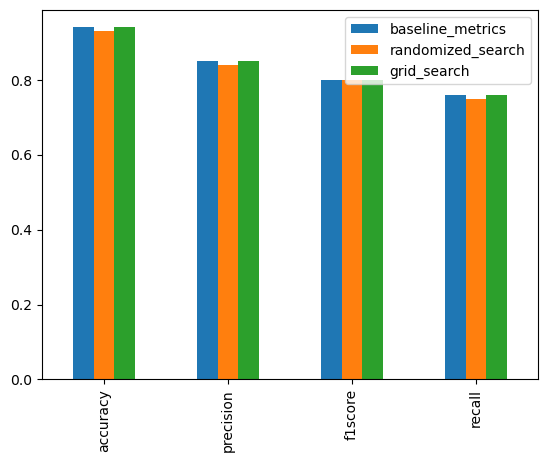

In [64]:
plt.figure(figsize=(10,8))
compare_metrics.plot.bar()